In [204]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn import datasets, metrics
from __future__ import division
%matplotlib inline

import sklearn
if float(sklearn.__version__[:4])>=0.18:
    from sklearn.model_selection import train_test_split
else:
    from sklearn.cross_validation import train_test_split
    
def normalization(X):
    return X/np.amax(X, axis=0)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoid_prime(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

def forward(X, W1, W2):
    #Propagate inputs though network, get yHat
    z2 = np.dot(X, W1)
    a2 = sigmoid(z2)
    z3 = np.dot(a2, W2)
    yHat = sigmoid(z3)
    return yHat

def cost(X, y, W1, W2, Lambda):
    yHat = forward(X, W1,W2)
    J = 0.5*sum((y-yHat)**2)/X.shape[0] + (Lambda/2)*(np.sum(W1**2)+np.sum(W2**2))
    return J

def cost_prime(X, y, W1, W2):
    #Compute derivative with respect to W1 and W2 for a given X and y:
    z2 = np.dot(X, W1)
    a2 = sigmoid(z2)
    z3 = np.dot(a2, W2)
    yHat = sigmoid(z3)
    delta3 = np.multiply(-(y-yHat), sigmoid_prime(z3))
    dJdW2 = np.dot(a2.T, delta3)/X.shape[0] + Lambda*W2
    delta2 = np.dot(delta3, W2.T)*sigmoid_prime(z2)
    dJdW1 = np.dot(X.T, delta2)/X.shape[0] + Lambda*W1
    return dJdW1, dJdW2

In [206]:
# load data
data = datasets.load_iris()
#data = datasets.load_boston()

X = data.data
y = data.target.reshape((data.target.shape[0],1))
# neitralisation
X = normalization(X)
y = normalization(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [207]:
# settings
hidden_size = 100
learning_rate = 10
Lambda = 0.001
max_iter = 100000

In [208]:
input_size = X.shape[1]
output_size = y.shape[1]

#start values
W1 = np.random.randn(input_size, hidden_size)
W2 = np.random.randn(hidden_size, output_size)

In [209]:
#training
scores = []
scores_test = []
for i in range(max_iter):
    scores.append(cost(X_train, y_train, W1, W2, Lambda))
    scores_test.append(cost(X_test, y_test, W1, W2, Lambda))
    #convergence condition:
    if (i > 50 and
        abs(scores[-1][0] - scores[-2][0])/scores[-2][0] < 0.000001):
        print "finished on {} iteration".format(i)
        break
    dJdW1, dJdW2 = cost_prime(X_train, y_train, W1, W2)
    W1 = W1 - learning_rate*dJdW1
    W2 = W2 - learning_rate*dJdW2
    learning_rate = learning_rate*0.9
    

finished on 88 iteration


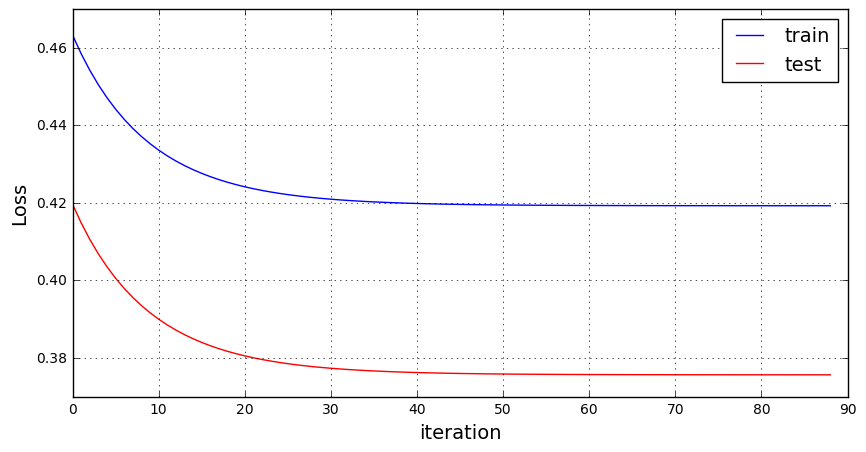

In [210]:
#plot
plt.figure(figsize=(10,5))
plt.plot(range(len(scores)), scores, label = 'train', c='b')
plt.plot(range(len(scores_test)), scores_test, label='test', c='r')

plt.legend(fontsize=14)
plt.grid()
plt.xlabel('iteration', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.show()

In [211]:
#1. ROC curve for 0 and 1 classes

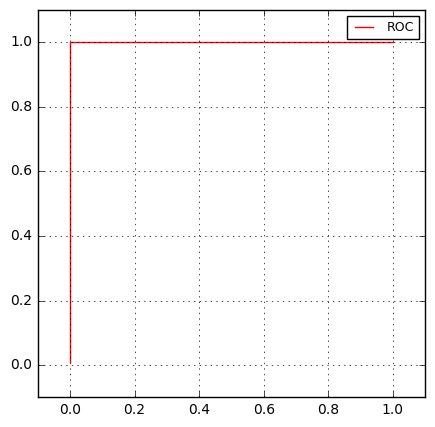

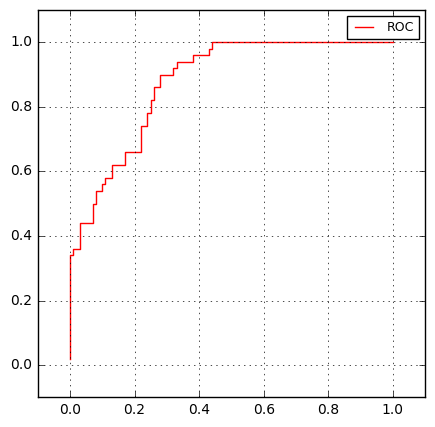

In [212]:
def plot_ROC(y_temp, y_pred):
    fpr, tpr, thresholds = metrics.roc_curve(y_temp, y_pred)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label = 'ROC', c='r')
    plt.ylim(-0.1,1.1)
    plt.xlim(-0.1,1.1)
    plt.legend(fontsize=9)
    plt.grid()
    plt.show()

y_pred = forward(X, W1, W2)
if data.DESCR[:20] == 'Iris Plants Database':
    y_temp = y.copy()
    y_temp[y_temp!=0] = 1 
    y_temp[y_temp==0] = 0
    plot_ROC(y_temp, y_pred)
    y_temp = y.copy()
    y_temp[y_temp!=1] = 0 
    y_temp[y_temp==1] = 1    
    plot_ROC(y_temp, y_pred)